In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
%matplotlib inline
from matplotlib.colorbar import colorbar_factory
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV


In [2]:
df1=pd.read_excel(r"D:\Новая папка\\Users\\HP\Загрузки\hw_data_composite/X_nup.xlsx")

In [3]:
df2=pd.read_excel(r"D:\Новая папка\\Users\\HP\Загрузки\hw_data_composite/X_bp.xlsx")

In [4]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1023.0,511.000000,295.458965,0.000000,255.500000,511.000000,766.500000,1022.000000
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   float64
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(11)
me

In [6]:
df=df2.merge(df1, how="inner")
df1.dropna(inplace=True)

In [7]:
df.drop('Unnamed: 0',axis = 1, inplace = True)
print(df.shape)
df.head()

(1023, 13)


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [8]:
Q1 = df2.quantile(q=.25)
Q3 = df2.quantile(q=.75)
IQR = Q3 - Q1
df = df2[~((df2 < (Q1-1.5*IQR)) | (df2 > (Q3+1.5*IQR))).any(axis=1)]

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
# нормализуем
scaler = MinMaxScaler(feature_range=(0, 1))
columns = df.columns
df = scaler.fit_transform(np.array(df))
df = pd.DataFrame(df, columns=columns)
#df.head()

In [11]:
y_label = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']
y = df[y_label]
X = df.drop(y_label, axis = 1)

In [14]:
import seaborn as sns

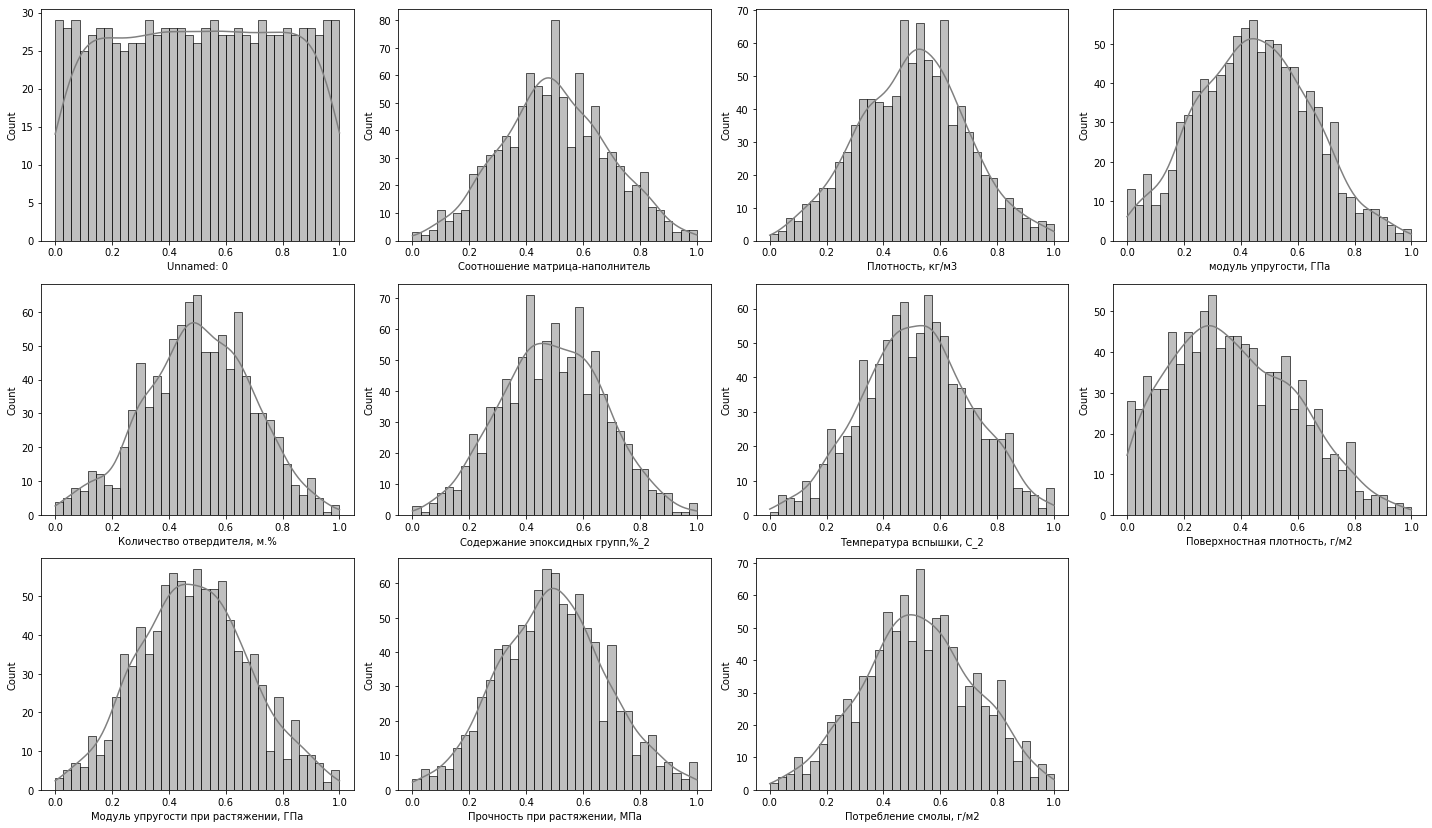

In [15]:
from matplotlib.colorbar import colorbar_factory
def histogram (df, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 15))
    for i, column in enumerate(df.columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=df, x=column, kde=True, bins=35, color = 'grey')
    fig.tight_layout()
    plt.show()

histogram(df, 4, 4)

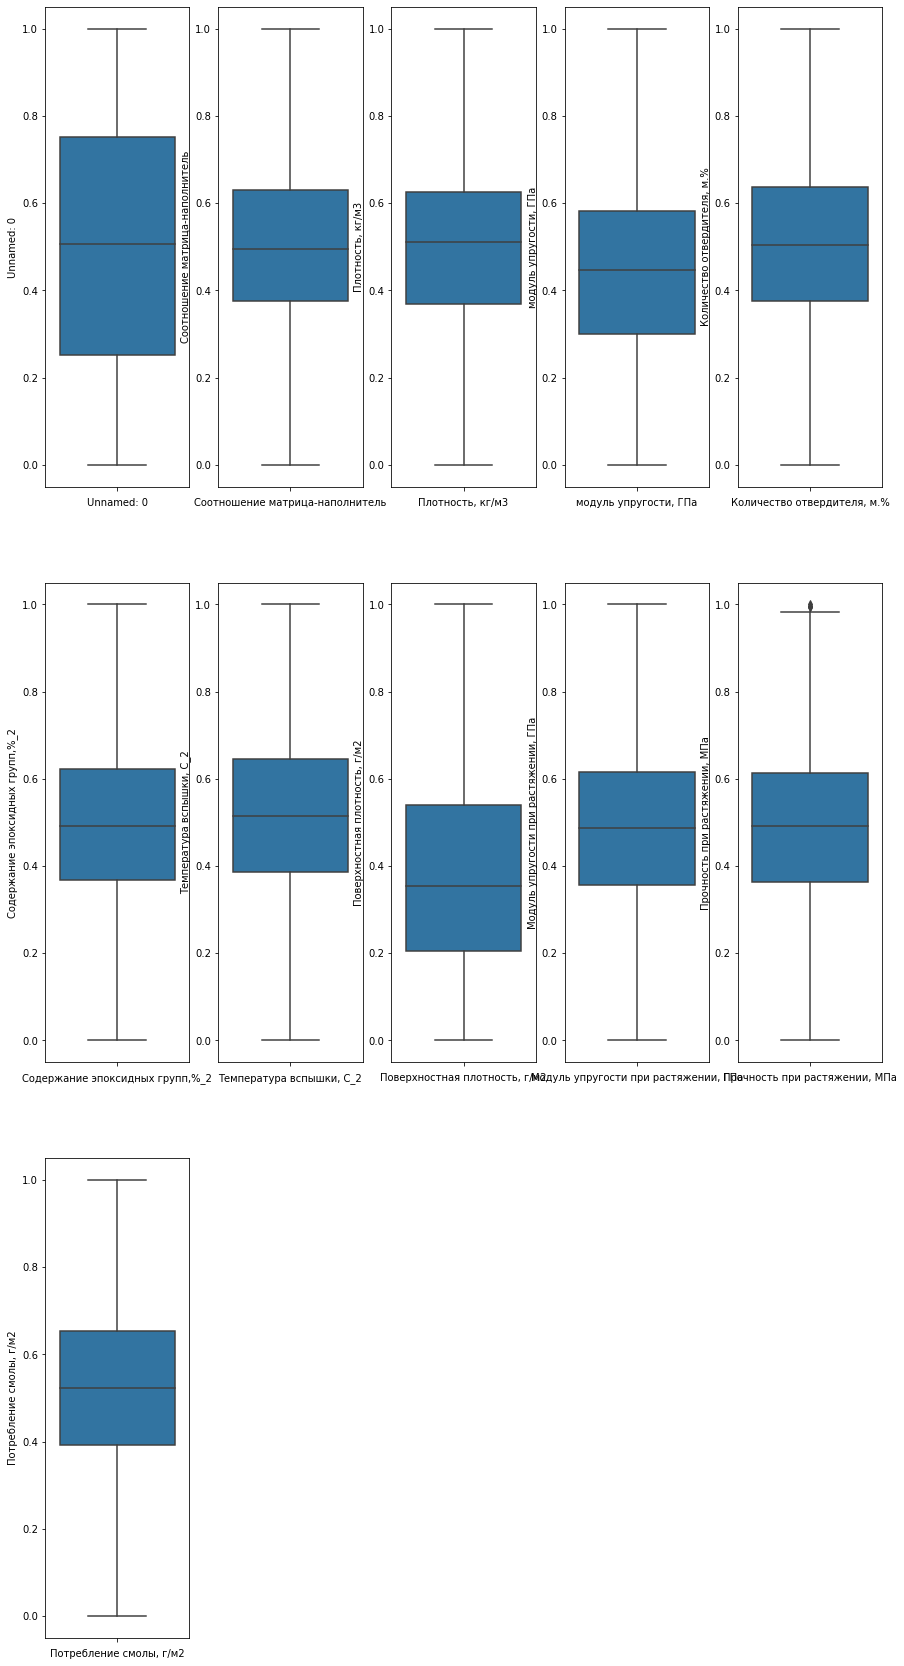

In [16]:
def box_pl2(df):
  col = 5  # столбцы
  k = 1  # счетчик
  row = 3  # строки

  fig = plt.figure(figsize=(15, 30))

  for i in df.columns:
      plt.subplot(row, col, k)
      plt.xlabel(i)
      sns.boxplot(y = df[i])
      k+=1
    
  plt.show()
box_pl2(df)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
loss_df = pd.DataFrame(columns=['target','model','MSE','R2'])


In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
df =pd.DataFrame([])
linear_model = KNeighborsRegressor()
linear_model.fit(X_train,  y_train)
y_pred = linear_model.predict(X_test)
def add_loss(loss_df, model_name):
  MSE = mean_squared_error(y_test, y_pred)
  R2 = r2_score(y_test, y_pred)


model = KNeighborsRegressor()
grid = {'n_neighbors' : range(10,20,40), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }

gsc = GridSearchCV(model, grid, n_jobs=-1, cv=10,verbose = 1)
gsc.fit(X_train,  y_train)
model = gsc.best_estimator_

MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
model_name = 'KNeighborsRegressor'
loss_df = add_loss(loss_df,model_name)
                               
  # print(df.head())
  #loss_df = pd.concat([loss_df, df],ignore_index=True)
  #return loss_df
  

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [31]:
gsc.best_estimator_

KNeighborsRegressor(n_neighbors=10)

In [32]:
print(MSE)

0.04425619835198465


In [33]:
print(); print(gsc.best_estimator_.get_params())


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


In [35]:
predictions = gsc.predict(X_test)
mae = np.mean(abs(predictions - y_test))

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [36]:
print(mae)

Модуль упругости при растяжении, ГПа    0.162537
Прочность при растяжении, МПа           0.161602
dtype: float64


In [37]:
predictionsc = gsc.predict(X_train)
mae_train = np.mean(abs(predictionsc - y_train))

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [38]:
print(mae_train)

Модуль упругости при растяжении, ГПа    0.145765
Прочность при растяжении, МПа           0.139428
dtype: float64


In [39]:
print(MSE)

0.04425619835198465


In [40]:
print(R2)

-0.16575021323922634


In [44]:
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [50]:
from sklearn.ensemble import RandomForestRegressor
# параметры для подстройки
model = RandomForestRegressor(random_state=14)
grid = {
    'n_estimators' : range(10,20,40),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1, 2, 3),
    'criterion':['mse']
}

# модель для оптимизации

gsca = GridSearchCV(model, grid, n_jobs=-1, cv=10)
gsca.fit(X_train,  y_train)
model = gsca.best_estimator_

MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)
model_name = 'SVR'
loss_df = add_loss(loss_df,model_name)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [51]:
gsca.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=1, max_features='sqrt',
                      n_estimators=10, random_state=14)

In [52]:
print(MSE)

0.04425619835198465


In [54]:
predictions = gsca.predict(X_test)
mae = np.mean(abs(predictions - y_test))

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [55]:
print(mae)

Модуль упругости при растяжении, ГПа    0.157582
Прочность при растяжении, МПа           0.156794
dtype: float64


In [56]:
predictionsc = gsca.predict(X_train)
mae_train = np.mean(abs(predictionsc - y_train))

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [57]:
print(mae_train)

Модуль упругости при растяжении, ГПа    0.154272
Прочность при растяжении, МПа           0.145712
dtype: float64


In [58]:
gsca.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=1, max_features='sqrt',
                      n_estimators=10, random_state=14)